In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df=pd.read_csv('Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [5]:
df.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


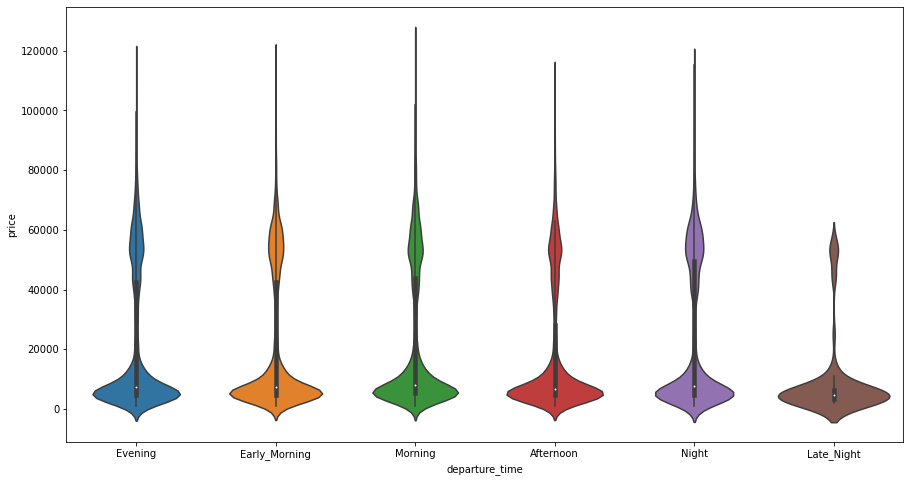

In [7]:
plt.figure(figsize=(15,8))
sns.violinplot(df['departure_time'],df['price'])
plt.show()

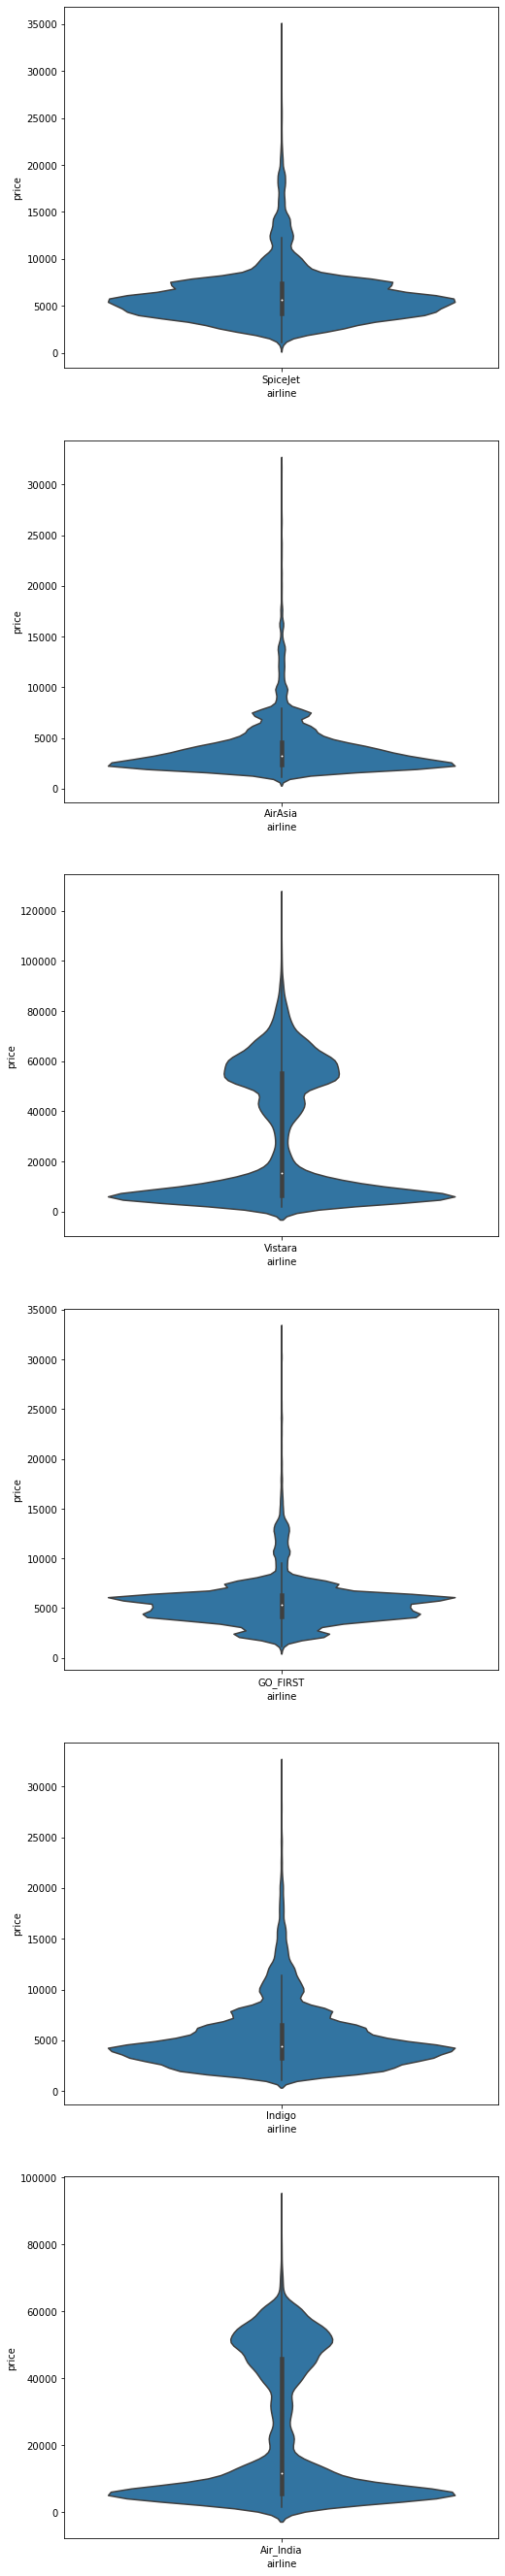

In [8]:
airlines=df['airline'].unique()
j=0
f,ax=plt.subplots(6,1,figsize=(8,48))
for i in airlines:
    sns.violinplot(df[df['airline']==i]['airline'],df[df['airline']==i]['price'],ax=ax[j])
    j=j+1

plt.show()

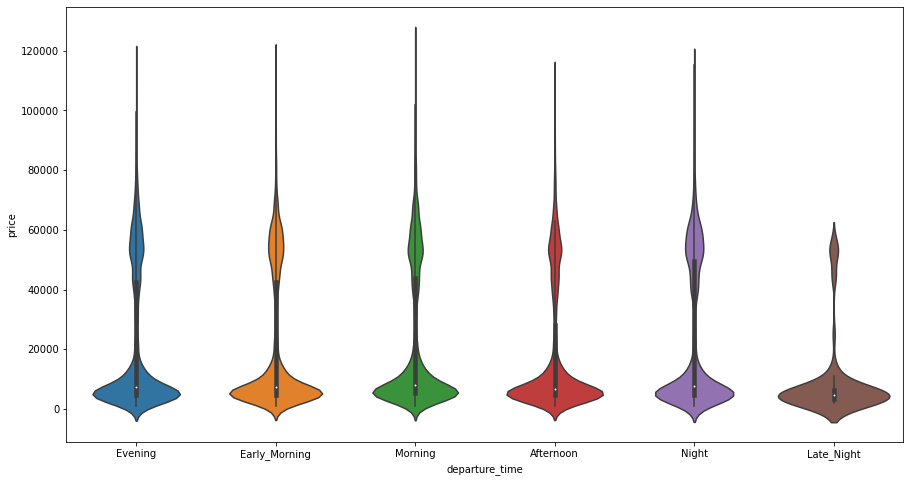

In [9]:
plt.figure(figsize=(15,8))
sns.violinplot(df['departure_time'],df['price'])
plt.show()

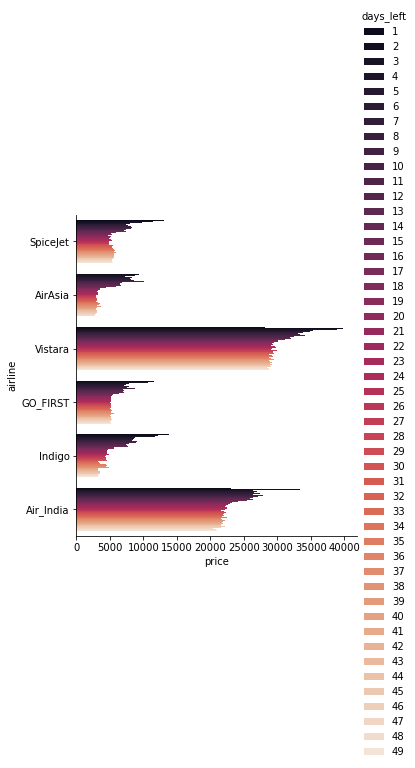

In [10]:
sns.catplot(x='price',y='airline',kind='bar',hue='days_left',palette='rocket',data=df,ci=None)

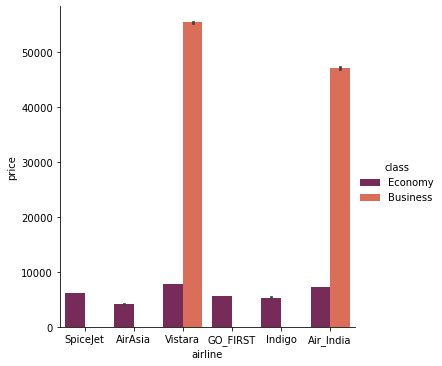

In [11]:
sns.catplot(y='price',x='airline',kind='bar',hue='class',palette='rocket',data=df)

### Does Price vary with Airlines?

<Figure size 1440x864 with 0 Axes>

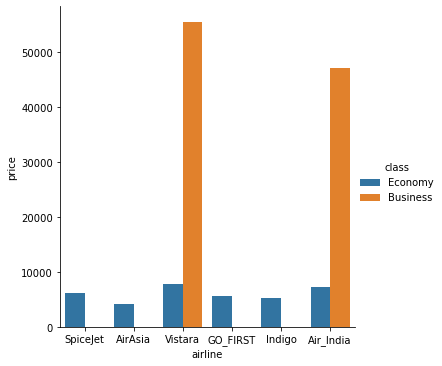

In [12]:
plt.figure(figsize=(20,12))
sns.catplot(x='airline',y='price',data=df,kind='bar',hue='class',ci=None,legend=True)
plt.show()

### Yes, Price varies with Airline, Vistara is costlier than other airlines. AirAsia is the cheapest airline

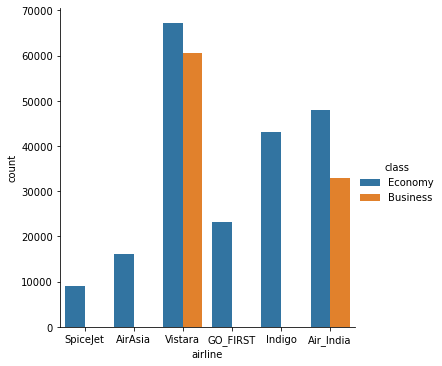

In [13]:
sns.catplot(x='airline',kind='count',data=df,hue='class')

### How is the price affected when tickets are bought in just 1 or 2 days before departure?

#### Economy Class

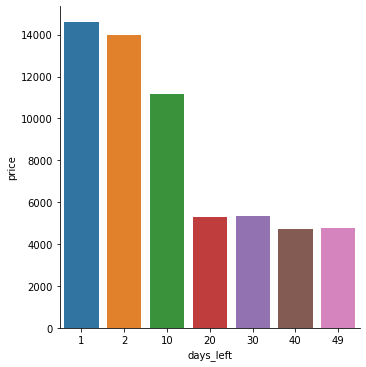

In [14]:
sns.catplot(df[(df['class']=='Economy')& ((df['days_left']==1) | (df['days_left']==2) | (df['days_left']==10) | (df['days_left']==20) | (df['days_left']==30) | (df['days_left']==40) | (df['days_left']==49))]['days_left'],df['price'],kind='bar',data=df,ci=None)

#### Business Class

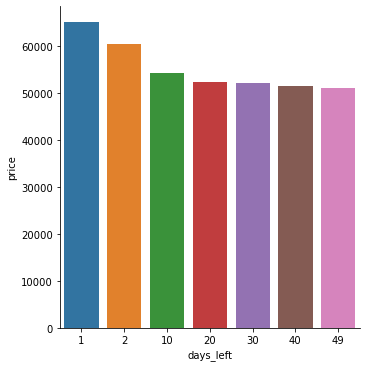

In [15]:
sns.catplot(df[(df['class']=='Business')& ((df['days_left']==1) | (df['days_left']==2) | (df['days_left']==10) | (df['days_left']==20) | (df['days_left']==30) | (df['days_left']==40) | (df['days_left']==49))]['days_left'],df['price'],kind='bar',data=df,ci=None)

<Figure size 1584x576 with 0 Axes>

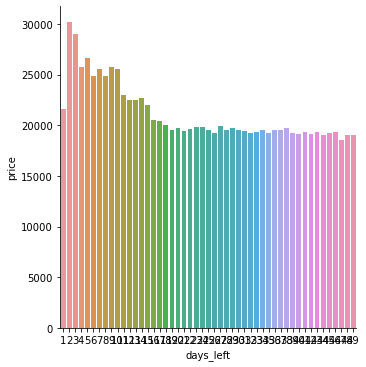

In [16]:
plt.figure(figsize=(22,8))
sns.catplot(x='days_left',y='price',data=df,kind='bar',ci=None)
plt.show()

### Price Increases as the journey day decreases, 1 day before price decreases (may be airline try to sell the leftover tickets in less price)
##### 1 day left - 1900 people book Mean price 21000
##### 2 day left - 4000 people book Mean price 30000

<AxesSubplot:xlabel='days_left', ylabel='count'>

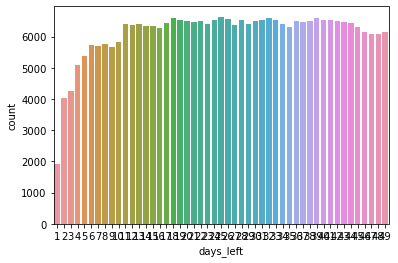

In [17]:
sns.countplot(x='days_left',data=df)

### Does ticket price change based on the departure time and arrival time?

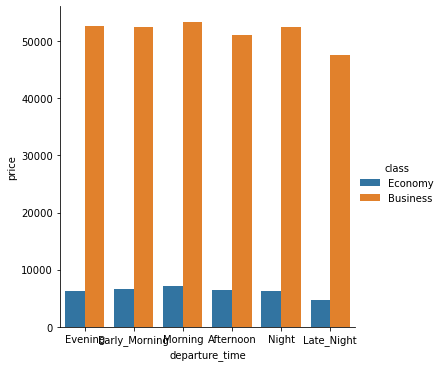

In [18]:
sns.catplot(x='departure_time',y='price',data=df,kind='bar',ci=None,hue='class')

In [19]:
df_business=df[df['class']=='Business']
df_economy=df[df['class']=='Economy']

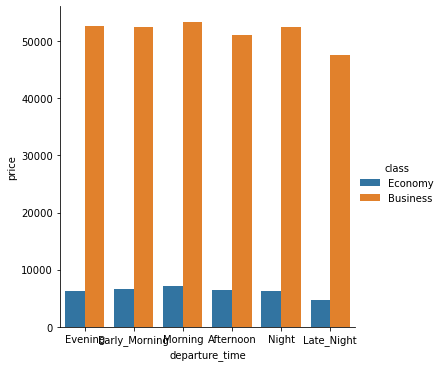

In [20]:
sns.catplot(x='departure_time',y='price',data=df,kind='bar',ci=None,hue='class')

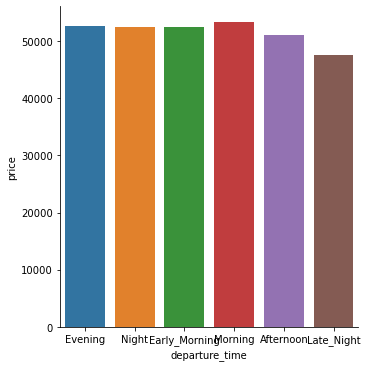

In [21]:
sns.catplot(x='departure_time',y='price',data=df_business,kind='bar',ci=None)

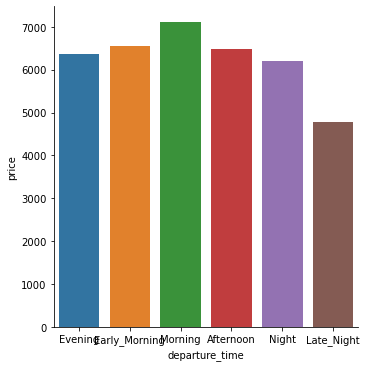

In [22]:
sns.catplot(x='departure_time',y='price',data=df_economy,kind='bar',ci=None)

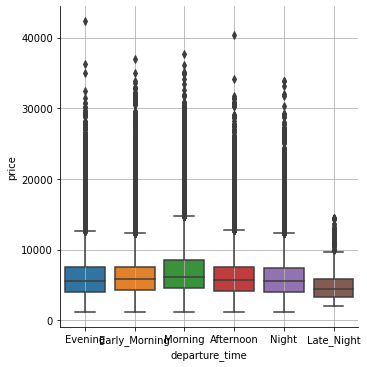

In [23]:
sns.catplot(x='departure_time',y='price',data=df_economy,kind='box',ci=None)
plt.grid()

In [24]:
dep_time=df_economy['departure_time'].unique()
median_price_at_dep_time={}
print("Median")
for i in dep_time:
    median_price_at_dep_time[i]=df_economy[df_economy['departure_time']==i]['price'].median()
    
conf_cases_list = sorted(median_price_at_dep_time.items(), key=lambda x:x[1],reverse=True)
for i in conf_cases_list:
    print(i[0],":",i[1])

Median
Morning : 6067.0
Early_Morning : 5778.0
Afternoon : 5656.0
Night : 5525.0
Evening : 5507.0
Late_Night : 4439.0


#### Considering Median, Late_Night prices are less. Morning Prices are more, because airlines may take advantage by increasing morning's price because someone travelling for a business conference or travelling from home town to office location can go to office in the same day. Many people prefer morning time rather than Early Morning Flight
#### Price depends on Departure time

In [25]:
mean_price_at_dep_time={}
print("Mean")
for i in dep_time:
    mean_price_at_dep_time[i]=df_economy[df_economy['departure_time']==i]['price'].mean()
    
conf_cases_list = sorted(mean_price_at_dep_time.items(), key=lambda x:x[1],reverse=True)
for i in conf_cases_list:
    print(i[0],":",i[1])

Mean
Morning : 7119.019663669323
Early_Morning : 6560.315391535298
Afternoon : 6473.095871754859
Evening : 6360.7507408329
Night : 6205.964764056718
Late_Night : 4784.69948630137


In [26]:
arv_time=df['arrival_time'].unique()
median_price_at_arv_time={}
print("Median")
for i in arv_time:
    median_price_at_arv_time[i]=df_economy[df_economy['arrival_time']==i]['price'].median()
    
conf_cases_list = sorted(median_price_at_arv_time.items(), key=lambda x:x[1],reverse=True)
for i in conf_cases_list:
    print(i[0],":",i[1])

Median
Evening : 6170.0
Night : 5873.0
Morning : 5660.0
Afternoon : 5437.0
Early_Morning : 5029.0
Late_Night : 4449.0


#### Price also depends on Arrival time. Price is more in evening and least in Late Night 

## How the price changes with change in Source and Destination?

In [27]:
source=df['source_city'].unique()
median_price_at_source={}
print("Median Price @ Source")
for i in source:
    median_price_at_source[i]=df_economy[df_economy['source_city']==i]['price'].median()
    
conf_cases_list = sorted(median_price_at_source.items(), key=lambda x:x[1],reverse=True)
for i in conf_cases_list:
    print(i[0],":",i[1])

Median Price @ Source
Kolkata : 6461.0
Bangalore : 5733.0
Mumbai : 5670.0
Delhi : 5504.0
Hyderabad : 5441.0
Chennai : 5206.0


#### Price from Kolkata is costlier. Price from Chennai is Cheapest
#### Can do feature engineering in this format:-
##### Kolkata : 0, Bangalore : 1, Mumbai : 2, Delhi : 3, Hyderabad : 4, Chennai : 5

In [28]:
dest=df['destination_city'].unique()
median_price_at_dest={}
print("Median Price @ Destination")
for i in dest:
    median_price_at_dest[i]=df_economy[df_economy['destination_city']==i]['price'].median()
    
conf_cases_list = sorted(median_price_at_dest.items(), key=lambda x:x[1],reverse=True)
for i in conf_cases_list:
    print(i[0],":",i[1])

Median Price @ Destination
Kolkata : 5960.0
Bangalore : 5959.0
Mumbai : 5740.5
Hyderabad : 5657.0
Delhi : 5547.0
Chennai : 5348.0


#### Price from Kolkata is costlier. Price from Chennai is Cheapest
#### Can do feature engineering in this format:-
##### Kolkata : 0, Bangalore : 1, Mumbai : 2, Hyderabad : 3, Delhi : 4, Chennai : 5

## How does the ticket price vary between Economy and Business class?

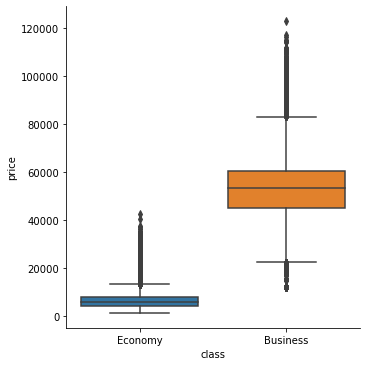

In [29]:
sns.catplot(x='class',y='price',kind='box',data=df)

In [30]:
df['duration'].value_counts()

2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.50       1
44.50       1
41.08       1
41.50       1
Name: duration, Length: 476, dtype: int64

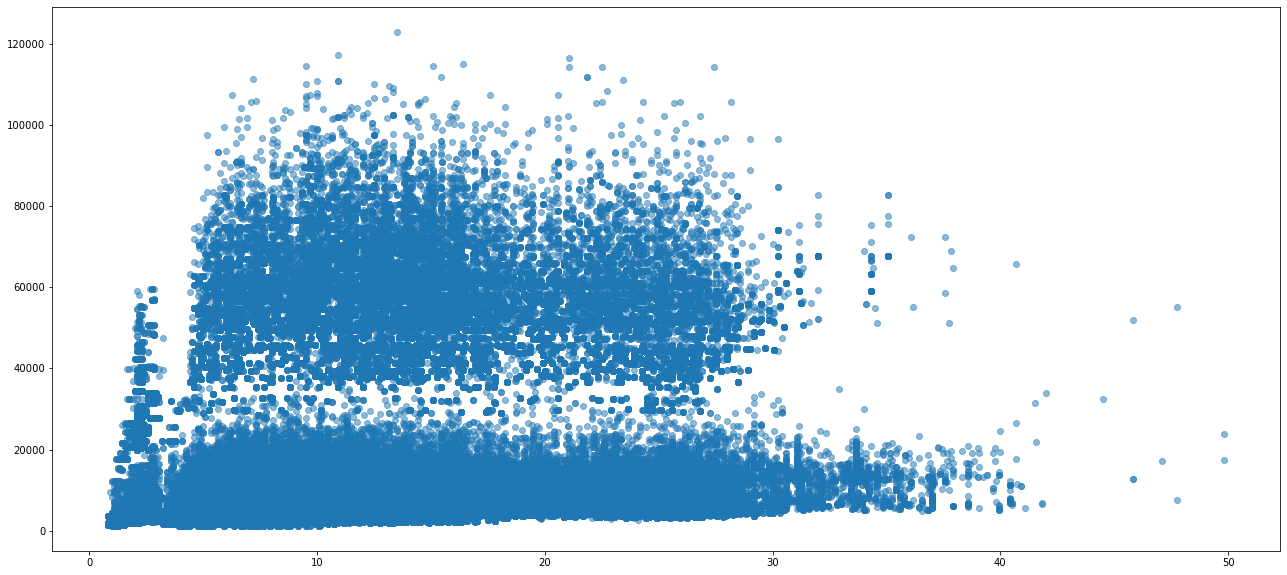

In [31]:
plt.figure(figsize=(22,10))
plt.scatter(df['duration'],df['price'],alpha=0.5)
plt.show()

#### Price also depends on class. Less for Economy class, More for Business class

#### dont have to remove outliers since RandomForestRegressor is not sensitive to outlier

In [32]:
import copy
df_copy=copy.deepcopy(df)

#### Replacing the feature values with numerical categorical value

In [33]:
df_copy.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [34]:
#df_copy['airline'].replace(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo','Air_India'],[0,1,2,3,4,5],inplace=True)
df_copy=pd.get_dummies(df_copy,columns=['airline','source_city','destination_city'],drop_first=True)

In [35]:
df_copy.columns

Index(['Unnamed: 0', 'flight', 'departure_time', 'stops', 'arrival_time',
       'class', 'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [36]:
df_copy.drop('flight',axis=1,inplace=True)

In [39]:
df_copy['departure_time'].replace(['Late_Night', 'Evening', 'Night', 'Afternoon', 'Early_Morning', 'Morning'],[0,1,2,3,4,5],inplace=True)

In [40]:
df_copy['arrival_time'].replace(['Late_Night', 'Early_Morning', 'Afternoon', 'Morning', 'Night', 'Evening'],[0,1,2,3,4,5],inplace=True)

In [41]:
df_copy['stops'].replace(['zero', 'one', 'two_or_more'],[0,1,2],inplace=True)

In [42]:
df_copy['class'].replace(['Economy', 'Business'],[0,1],inplace=True)

In [44]:
df_copy.columns

Index(['Unnamed: 0', 'departure_time', 'stops', 'arrival_time', 'class',
       'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [45]:
df_copy.drop('Unnamed: 0',axis=1,inplace=True)

In [47]:
df_copy.head(10)

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1,0,4,0,2.17,1,5953,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,4,0,3,0,2.33,1,5953,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,4,0,1,0,2.17,1,5956,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,5,0,2,0,2.25,1,5955,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,5,0,3,0,2.33,1,5955,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,5,0,2,0,2.33,1,5955,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,5,0,3,0,2.08,1,6060,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7,3,0,5,0,2.17,1,6060,0,0,0,...,0,1,0,0,0,0,0,0,0,1
8,4,0,3,0,2.17,1,5954,0,1,0,...,0,1,0,0,0,0,0,0,0,1
9,3,0,5,0,2.25,1,5954,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [48]:
column_to_move=df_copy.pop("price")
df_copy.insert(21,"price",column_to_move)

In [49]:
df_copy.columns

Index(['departure_time', 'stops', 'arrival_time', 'class', 'duration',
       'days_left', 'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai', 'price'],
      dtype='object')

In [50]:
df_copy.head(10)

,departure_time,stops,arrival_time,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,price
0,1,0,4,0,2.17,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,5953
1,4,0,3,0,2.33,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,5953
2,4,0,1,0,2.17,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,5956
3,5,0,2,0,2.25,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,5955
4,5,0,3,0,2.33,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,5955
5,5,0,2,0,2.33,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,5955
6,5,0,3,0,2.08,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,6060
7,3,0,5,0,2.17,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,6060
8,4,0,3,0,2.17,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,5954
9,3,0,5,0,2.25,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,5954


### Consider Duration in the model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
train,test = train_test_split(df_copy, test_size = 0.3,random_state=0)

In [53]:
# x_train,y_train,x_test,y_test
x_train=train[train.columns[0:-1]]
y_train=train[[train.columns[-1]]]
x_test=test[test.columns[0:-1]]
y_test=test[[test.columns[-1]]]

In [54]:
rf=RandomForestRegressor(n_estimators=100)

In [55]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [56]:
y_pred=rf.predict(x_test)

In [57]:
mse=mean_squared_error(y_test,y_pred)
rmse=mse**.5

In [58]:
print(mse)
print(rmse)

7794052.793648456
2791.7830849921806


##### R2 score on train dataset

In [59]:
rf.score(x_train,y_train)

0.997527931596585

##### R2 score on test datset

In [60]:
rf.score(x_test,y_test)

0.9848792690462118

### Hypertune the model
##### Searching the best parameters using RandomizedSearch CV

In [61]:
# importing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [62]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [63]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [64]:
rf_random_search_cv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [65]:
rf_random_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.8min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.7min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.6min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.6min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 1.6min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.7min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 2.6min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
rf_random_search_cv.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [67]:
pred_x_test=rf_random_search_cv.predict(x_test)

In [68]:
mse_random=mean_squared_error(y_test,pred_x_test)
rmse_random=mse_random**.5

In [69]:
print(mse_random)
print(rmse_random)

7848800.572693856
2801.5710900660465


##### R2 score on Test Dataset

In [70]:
r2_score(y_test,pred_x_test)

0.984773056468599

##### R2 score on Train Dataset

In [71]:
pred_x_train=rf_random_search_cv.predict(x_train)

In [72]:
r2_score(y_train,pred_x_train)

0.9892436683570591

#### Saving the Model into a Pickle File.

In [79]:
file=open('flight_price_predict_rf.pkl','wb')
pickle.dump(rf,file)

In [84]:
file_rf_random=open('flight_price_predict_rf_random.pkl','wb')
pickle.dump(rf_random_search_cv,file_rf_random)

In [80]:
model_rf=open('flight_price_predict_rf.pkl','rb')
model_rf=pickle.load(model_rf)

In [81]:
type(model_rf)

sklearn.ensemble._forest.RandomForestRegressor

In [82]:
model_rf.score(x_train,y_train)

0.997527931596585

In [83]:
model_rf.score(x_test,y_test)

0.9848792690462118

In [4]:
model_rf_random=open('flight_price_predict_rf_random.pkl','rb')
model_rf_random=pickle.load(model_rf_random)

In [86]:
type(model_rf_random)

sklearn.model_selection._search.RandomizedSearchCV

In [87]:
pred_x_test_pkl_rf_rand=rf_random_search_cv.predict(x_test)

In [88]:
r2_score(y_test,pred_x_test_pkl_rf_rand)

0.984773056468599

In [89]:
pred_x_ttrain_pkl_rf_rand=rf_random_search_cv.predict(x_train)

In [90]:
r2_score(y_train,pred_x_ttrain_pkl_rf_rand)

0.9892436683570591